# Hepatitis Data

## 1. Using scikit learn for building classification model to predict whether patient live or die.
## 2. Convert the best model into Onnx and deploy it to Azureml endpoint

In [1]:
#import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
#show all columns
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

In [3]:
#import our data file in to pandas dataframe.
import pandas as pd

hp = pd.read_csv (r'hepatitis.data')
hp.to_csv(r'hepatitis.csv', index = False)
hp

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
150,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
151,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
152,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


# Preprocessing

In [4]:
#rename columns from the index of description in readme.md
hp.rename(columns = {'2':'Class','30':'Age', '2.1':'Sex','1':'Steroid','2.2':'Antivirals','2.3':'Fatigue','2.4':'Malaise','2.5':'Anorexia','1.1':'Liver Big','2.6':'Liver Firm','2.7':'Spleen Palpable','2.8':'Spiders','2.9':'Ascites','2.10':'Varices','1.00':'Bilirubin','85':'Alk Phosphate','18':'Sgot','4.0':'Albumin','?':'Protime','1.2':'Histology'}, inplace = True)
hp

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
150,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
151,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
152,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [5]:
hp.dtypes

Class               int64
Age                 int64
Sex                 int64
Steroid            object
Antivirals          int64
Fatigue            object
Malaise            object
Anorexia           object
Liver Big          object
Liver Firm         object
Spleen Palpable    object
Spiders            object
Ascites            object
Varices            object
Bilirubin          object
Alk Phosphate      object
Sgot               object
Albumin            object
Protime            object
Histology           int64
dtype: object

In [6]:
#Checking for missing values in dataset
for i in hp.columns:
    if hp[i].dtype == object:
         print(i,hp[i][hp[i] == '?'].count())

Steroid 1
Fatigue 1
Malaise 1
Anorexia 1
Liver Big 10
Liver Firm 11
Spleen Palpable 5
Spiders 5
Ascites 5
Varices 5
Bilirubin 6
Alk Phosphate 29
Sgot 4
Albumin 16
Protime 66


In [7]:
#Fill missing values with median of the specific column, change data type to float
hp['Steroid']=hp['Steroid'].replace('?',np.nanmedian(pd.to_numeric(hp['Steroid'], errors='coerce')))
hp['Fatigue']=hp['Fatigue'].replace('?',np.nanmedian(pd.to_numeric(hp['Fatigue'], errors='coerce')))
hp['Malaise']=hp['Malaise'].replace('?',np.nanmedian(pd.to_numeric(hp['Malaise'], errors='coerce')))
hp['Anorexia']=hp['Anorexia'].replace('?',np.nanmedian(pd.to_numeric(hp['Anorexia'], errors='coerce')))
hp['Liver Big']=hp['Liver Big'].replace('?',np.nanmedian(pd.to_numeric(hp['Liver Big'], errors='coerce')))
hp['Liver Firm']=hp['Liver Firm'].replace('?',np.nanmedian(pd.to_numeric(hp['Liver Firm'], errors='coerce')))
hp['Spleen Palpable']=hp['Spleen Palpable'].replace('?',np.nanmedian(pd.to_numeric(hp['Spleen Palpable'], errors='coerce')))
hp['Spiders']=hp['Spiders'].replace('?',np.nanmedian(pd.to_numeric(hp['Spiders'], errors='coerce')))
hp['Ascites']=hp['Ascites'].replace('?',np.nanmedian(pd.to_numeric(hp['Ascites'], errors='coerce')))
hp['Varices']=hp['Varices'].replace('?',np.nanmedian(pd.to_numeric(hp['Varices'], errors='coerce')))
hp['Albumin']=hp['Albumin'].replace('?',np.nanmedian(pd.to_numeric(hp['Albumin'], errors='coerce')))
hp['Alk Phosphate']=hp['Alk Phosphate'].replace('?',np.nanmedian(pd.to_numeric(hp['Alk Phosphate'], errors='coerce')))
hp['Bilirubin']=hp['Bilirubin'].replace('?',np.nanmedian(pd.to_numeric(hp['Bilirubin'], errors='coerce')))
hp['Sgot']=hp['Sgot'].replace('?',np.nanmedian(pd.to_numeric(hp['Sgot'], errors='coerce')))
hp['Protime']=hp['Protime'].replace('?',np.nanmedian(pd.to_numeric(hp['Protime'], errors='coerce')))
hp=hp.astype(np.float32)


In [8]:
#Change class to (0 and 1) from (1 and 2)
hp['Class']=hp.apply(lambda x: x['Class']-1,axis=1)
hp['Steroid']=hp.apply(lambda x: x['Steroid']-1,axis=1)
hp['Antivirals']=hp.apply(lambda x: x['Antivirals']-1,axis=1)
hp['Fatigue']=hp.apply(lambda x: x['Fatigue']-1,axis=1)
hp['Malaise']=hp.apply(lambda x: x['Malaise']-1,axis=1)
hp['Anorexia']=hp.apply(lambda x: x['Anorexia']-1,axis=1)
hp['Liver Big']=hp.apply(lambda x: x['Liver Big']-1,axis=1)
hp['Liver Firm']=hp.apply(lambda x: x['Liver Firm']-1,axis=1)
hp['Spleen Palpable']=hp.apply(lambda x: x['Spleen Palpable']-1,axis=1)
hp['Spiders']=hp.apply(lambda x: x['Spiders']-1,axis=1)
hp['Ascites']=hp.apply(lambda x: x['Ascites']-1,axis=1)
hp['Varices']=hp.apply(lambda x: x['Varices']-1,axis=1)
hp['Histology']=hp.apply(lambda x: x['Histology']-1,axis=1)
hp

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,1.0,50.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.0,42.0,3.5,61.0,0.0
1,1.0,78.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.0,32.0,4.0,61.0,0.0
2,1.0,31.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.0,52.0,4.0,80.0,0.0
3,1.0,34.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,200.0,4.0,61.0,0.0
4,1.0,34.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,95.0,28.0,4.0,75.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0.0,46.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.6,85.0,242.0,3.3,50.0,1.0
150,1.0,44.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,126.0,142.0,4.3,61.0,1.0
151,1.0,61.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8,75.0,20.0,4.1,61.0,1.0
152,1.0,53.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.0,19.0,4.1,48.0,1.0


In [9]:
hp.shape


(154, 20)

In [10]:
#describe the dataframe.
hp.describe()

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,0.792208,41.272728,1.097403,0.512987,0.844156,0.344156,0.603896,0.792208,0.844156,0.610390,0.805195,0.668831,0.870130,0.883117,1.413636,101.629868,85.610390,3.835064,61.487015,0.454545
std,0.407051,12.574108,0.297472,0.501462,0.363891,0.476642,0.490682,0.407051,0.363891,0.489253,0.397343,0.472169,0.337257,0.322329,1.194600,47.216637,88.712013,0.621145,17.254812,0.499554
min,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,26.000000,14.000000,2.100000,0.000000,0.000000
25%,1.000000,32.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.800000,78.000000,33.000000,3.500000,57.000000,0.000000
50%,1.000000,39.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,85.000000,58.000000,4.000000,61.000000,0.000000
75%,1.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.500000,119.750000,99.500000,4.200000,65.500000,1.000000
max,1.000000,78.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,295.000000,648.000000,6.400000,100.000000,1.000000


# Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

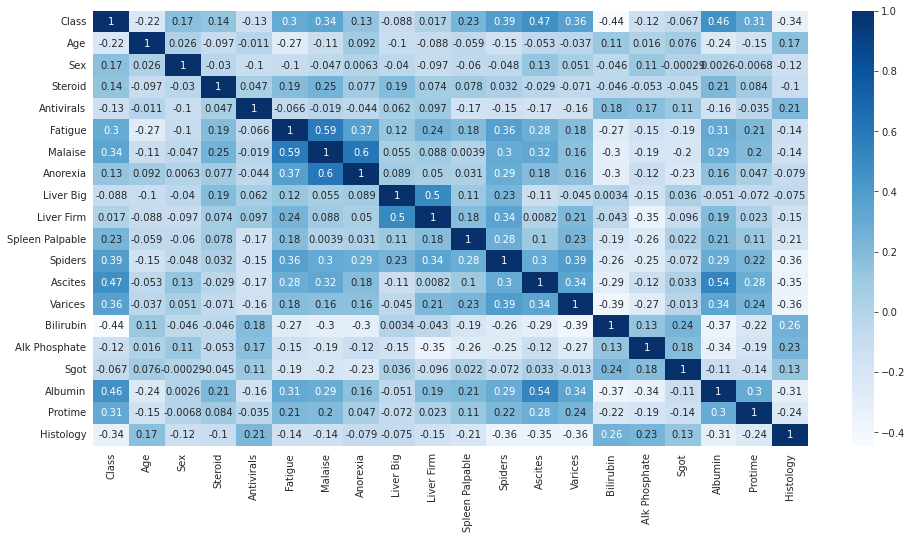

In [11]:
#Construct heatmap of correlation matrix
corr_matrix = hp.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix,annot=True, cmap="Blues")
plt.show

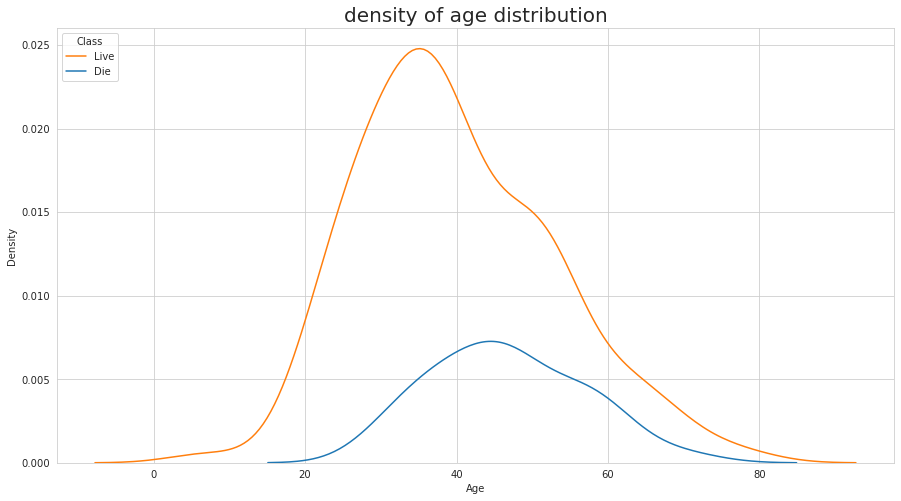

In [12]:
#age distribution of the patient

plt.figure(figsize=(15,8))
ax = sns.kdeplot(data=hp, x="Age",hue="Class")
ax.set_title('density of age distribution',fontsize = 20)
plt.legend(title='Class', loc='upper left', labels=['Live','Die' ])
plt.show()

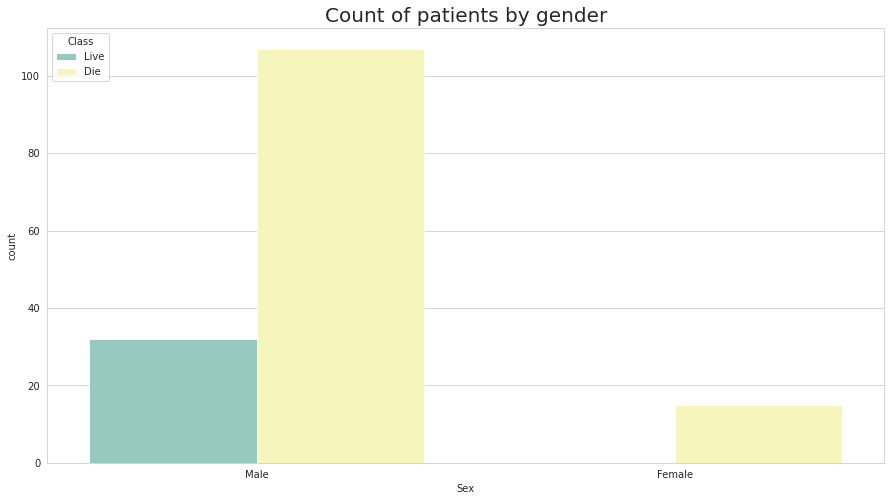

In [13]:
#Count of patients by gender
plt.figure(figsize=(15,8))
ax = sns.countplot(x='Sex', data=hp,palette="Set3", hue="Class")
ax.set_title('Count of patients by gender',fontsize = 20)
plt.legend(title='Class', loc='upper left', labels=['Live','Die' ])
ax.set_xticklabels(['Male','Female'])
plt.show()

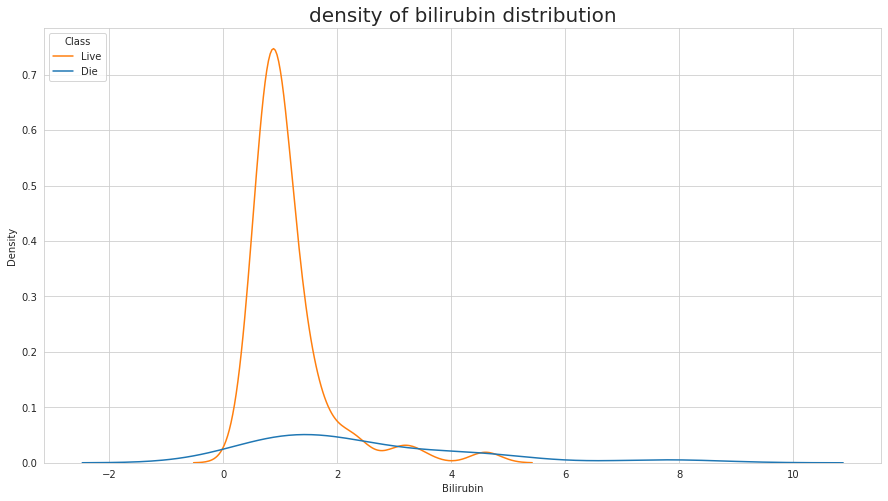

In [14]:
# construct density of Bilirubin distribution
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data=hp, x="Bilirubin",hue="Class")
ax.set_title('density of bilirubin distribution',fontsize = 20)
plt.legend(title='Class', loc='upper left', labels=['Live','Die' ])
plt.show()

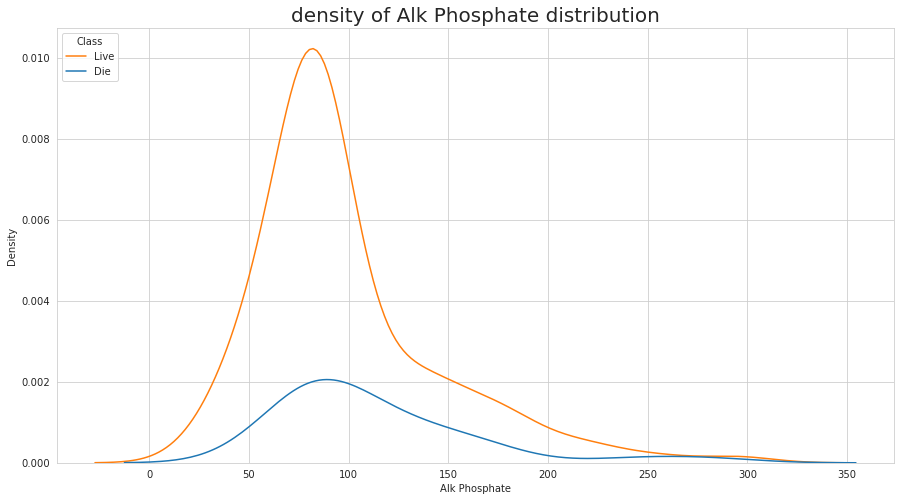

In [15]:
# construct density of Alk Phosphate distribution
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data=hp, x="Alk Phosphate",hue="Class")
ax.set_title('density of Alk Phosphate distribution',fontsize = 20)
plt.legend(title='Class', loc='upper left', labels=['Live','Die' ])
plt.show()

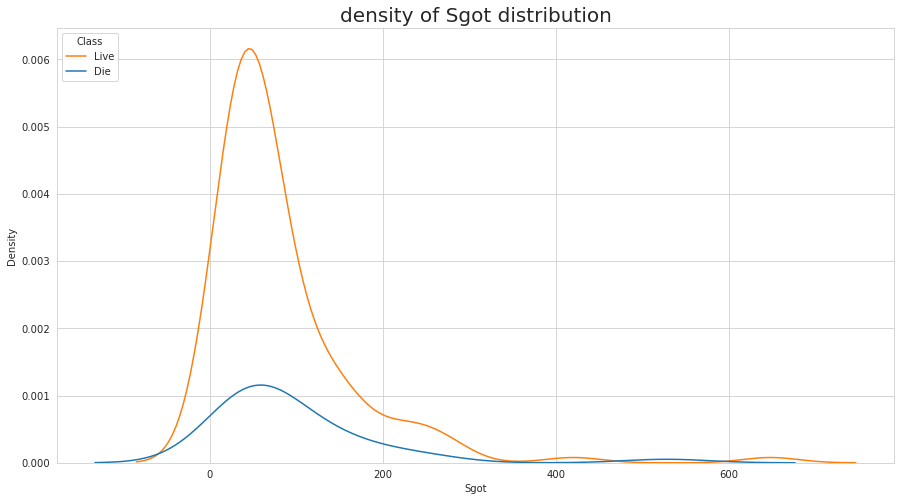

In [16]:
# construct density of Sgot distribution
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data=hp, x="Sgot",hue="Class")
ax.set_title('density of Sgot distribution',fontsize = 20)
plt.legend(title='Class', loc='upper left', labels=['Live','Die' ])
plt.show()

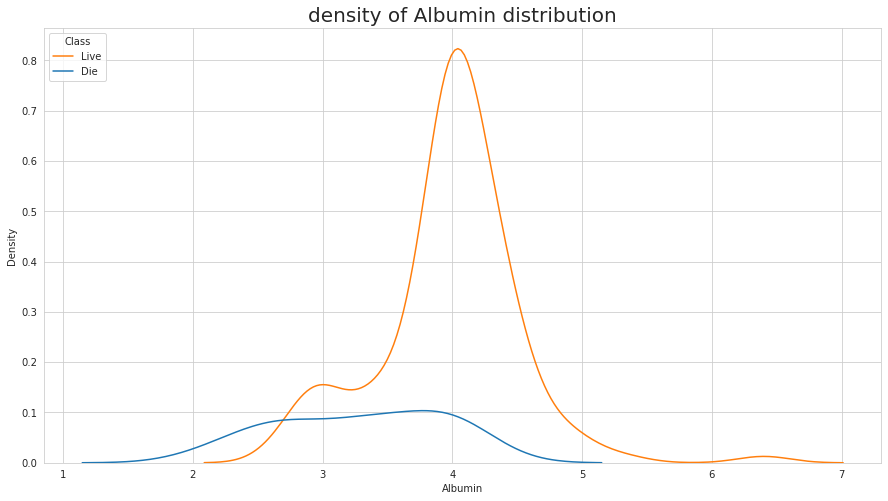

In [17]:
# construct density of Albumin distribution
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data=hp, x="Albumin",hue="Class")
ax.set_title('density of Albumin distribution',fontsize = 20)
plt.legend(title='Class', loc='upper left', labels=['Live','Die' ])
plt.show()

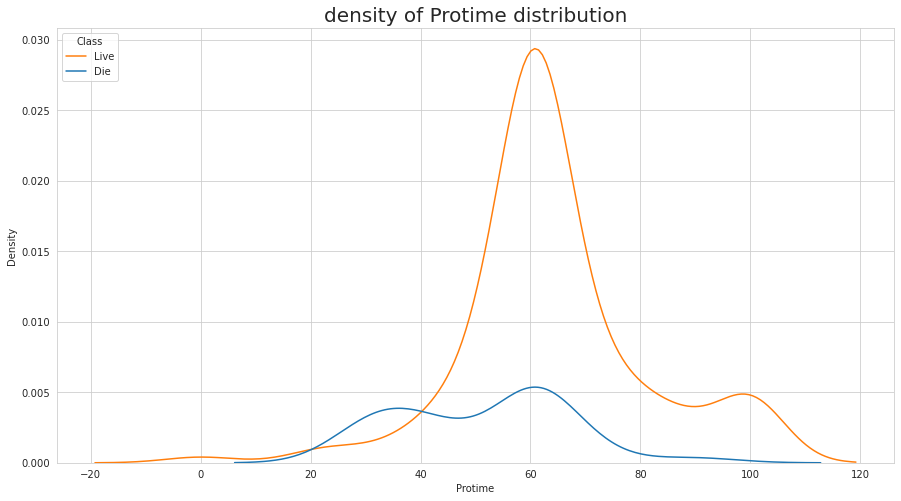

In [18]:
# construct density of Protime distribution
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data=hp, x="Protime",hue="Class")
ax.set_title('density of Protime distribution',fontsize = 20)
plt.legend(title='Class', loc='upper left', labels=['Live','Die' ])
plt.show()

# Machine Learning

In [19]:
#run all sklearn packages
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [20]:
#define X
X=hp.loc[:, hp. columns != 'Class']

In [21]:
#define y
y=hp['Class']

In [22]:
#train-test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.3)
print("Digits Train/Test Sizes : ",X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Digits Train/Test Sizes :  (107, 19) (47, 19) (107,) (47,)


In [23]:
#Check if our data imbalanced
hp['Class'].value_counts()

1.0    122
0.0     32
Name: Class, dtype: int64

## Since have imbalanced data, Class Weights will be implemented on every model.

# Use PCA method to project in 2D plane

explained variance ratio (n components): [0.75575308 0.20221066]


Text(0.5, 1.0, 'PCA of Hepetitis dataset')

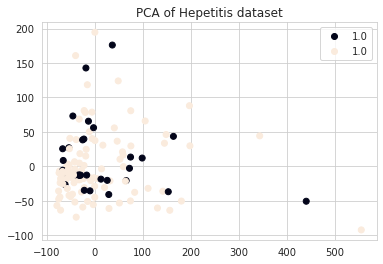

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (n components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()

plot = plt.scatter(X_r[:,0], X_r[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(hp['Class']))
plt.title("PCA of Hepetitis dataset")


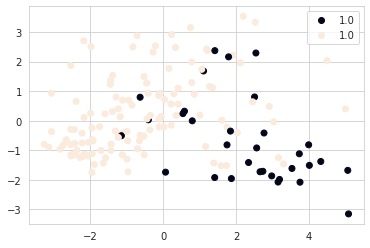

In [25]:
#Scalerizing to distinguish data in better shape
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
X_t = pipe.fit_transform(X)
plot = plt.scatter(X_t[:,0], X_t[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(hp['Class']))
plt.show()

# Decision Tree

In [26]:
clf = tree.DecisionTreeClassifier(class_weight="balanced")
clf = clf.fit(X_train, y_train)

In [27]:
clf_predictions=clf.predict(X_test)

In [28]:
#print out the results of prediction
print(confusion_matrix(y_test,clf_predictions))
print('\n')
print(classification_report(y_test,clf_predictions))
print(accuracy_score(y_test,clf_predictions))
clf_acc=accuracy_score(y_test,clf_predictions)
fig = plt.figure(figsize=(15,6))


[[ 6  6]
 [ 2 33]]


              precision    recall  f1-score   support

         0.0       0.75      0.50      0.60        12
         1.0       0.85      0.94      0.89        35

    accuracy                           0.83        47
   macro avg       0.80      0.72      0.75        47
weighted avg       0.82      0.83      0.82        47

0.8297872340425532


<Figure size 1080x432 with 0 Axes>

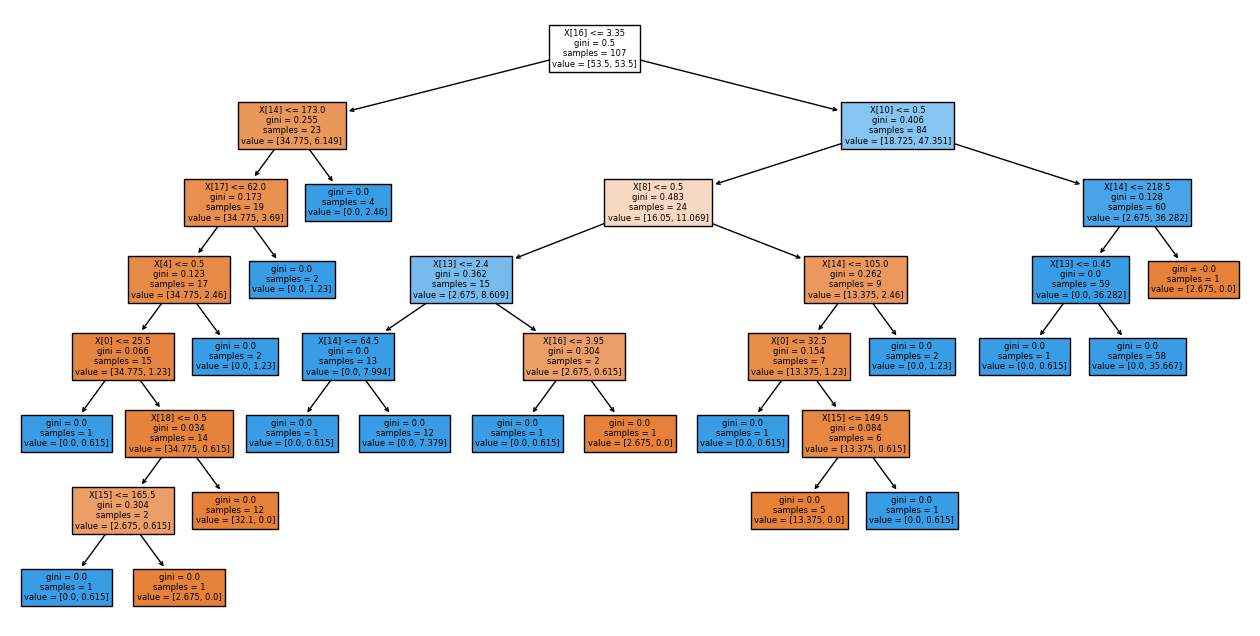

In [29]:
#plot decision tree structure
sns.reset_defaults()
plt.figure(figsize=(16,8))
tree.plot_tree(clf,filled=True)

plt.show()

# Random Forest

In [30]:
rfc=RandomForestClassifier(n_estimators=100,class_weight="balanced")

In [31]:
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [32]:
rfc_predictions = rfc.predict(X_test)

In [33]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, rfc_predictions)

# let's store some metadata
metadata = {}

metadata["dataset"] = "hepatitis"
metadata["random_state"] = 42
metadata["test_size"] = 0.3

metadata["model_module"] = rfc.__class__.__module__
metadata["model_type"] = rfc.__class__.__name__

metadata["r2_score"] = r2
metadata


{'dataset': 'hepatitis',
 'random_state': 42,
 'test_size': 0.3,
 'model_module': 'sklearn.ensemble._forest',
 'model_type': 'RandomForestClassifier',
 'r2_score': -0.0071428571428573395}

In [34]:
#print out the results of prediction
print(confusion_matrix(y_test,rfc_predictions))
print('\n')
print(classification_report(y_test,rfc_predictions))
print('\n')
print(accuracy_score(y_test,rfc_predictions))
rfc_acc=accuracy_score(y_test,rfc_predictions)

[[ 4  8]
 [ 1 34]]


              precision    recall  f1-score   support

         0.0       0.80      0.33      0.47        12
         1.0       0.81      0.97      0.88        35

    accuracy                           0.81        47
   macro avg       0.80      0.65      0.68        47
weighted avg       0.81      0.81      0.78        47



0.8085106382978723


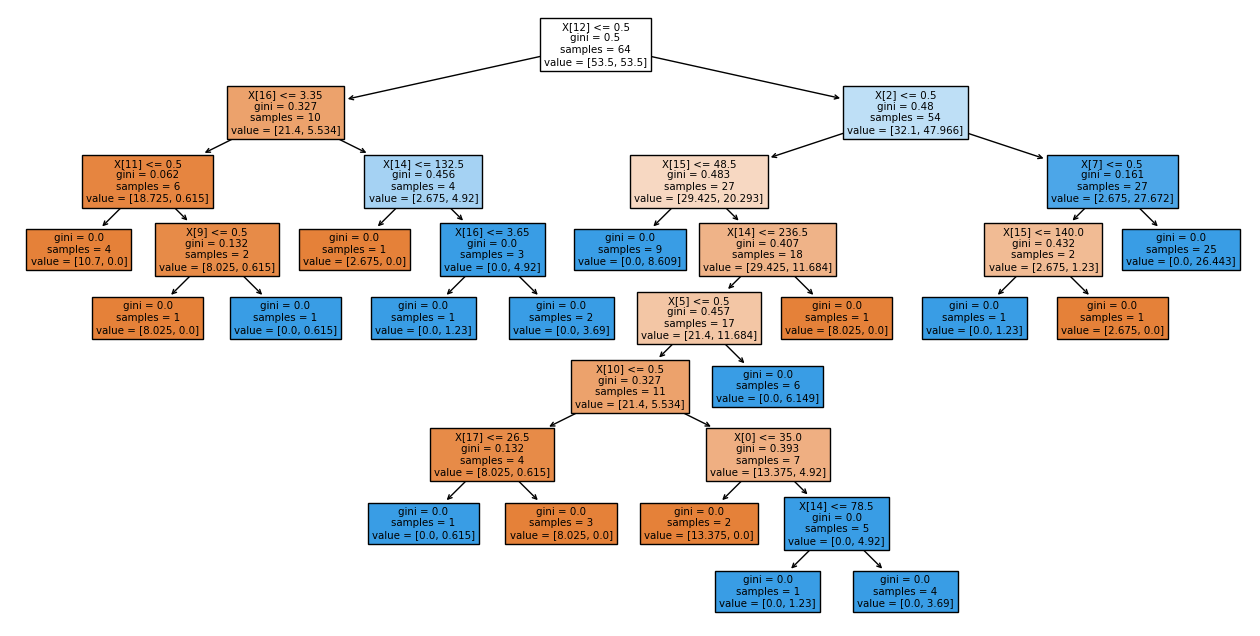

In [35]:
#plot decision tree structure
sns.reset_defaults()
rfc_est = rfc.estimators_[0]

plt.figure(figsize=(16,8))
tree.plot_tree(rfc_est,filled=True)
plt.show()

# Support vector

In [36]:
svc=svm.SVC(class_weight="balanced")
svc.fit(X_train, y_train)
SVC(decision_function_shape='ovo')

SVC(decision_function_shape='ovo')

In [37]:
svc_predictions=svc.predict(X_test)
svc_acc=accuracy_score(y_test,svc_predictions)

print(confusion_matrix(y_test,svc_predictions))
print('\n')
print(classification_report(y_test,svc_predictions))
print('\n')
print(accuracy_score(y_test,svc_predictions))


[[ 8  4]
 [17 18]]


              precision    recall  f1-score   support

         0.0       0.32      0.67      0.43        12
         1.0       0.82      0.51      0.63        35

    accuracy                           0.55        47
   macro avg       0.57      0.59      0.53        47
weighted avg       0.69      0.55      0.58        47



0.5531914893617021


In [38]:
# Generate scatter plot for training data # Get support vector indices
support_vector_indices = svc.support_
print(support_vector_indices)

[  5   7  10  13  22  28  29  38  39  41  43  48  52  53  77  93  94  95
  97 100   0   1   2   3   4   6   8   9  11  12  14  15  17  18  19  20
  21  23  24  25  26  27  30  31  33  34  35  36  37  40  42  44  45  46
  47  49  50  51  54  55  56  57  58  59  60  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  78  79  80  81  82  83  84  86  87  88
  90  91  96  98  99 101 102 103 104 105 106]


In [39]:
# Get number of support vectors per class
support_vectors_per_class = svc.n_support_
print(support_vectors_per_class)

[20 81]


# Compare models to pick our best model

<ipython-input-40-25ec4d078cdb>:3: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title('Confusion matrix of models')
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or Confusion

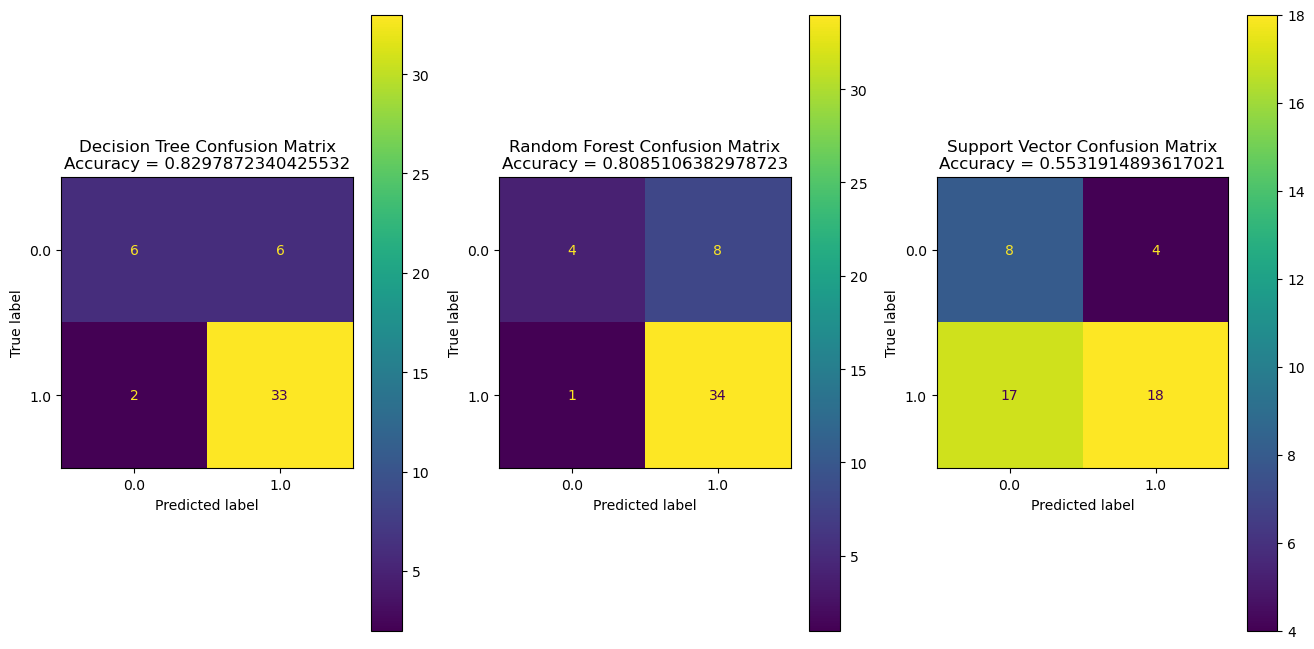

In [40]:
from sklearn.metrics import plot_confusion_matrix
fig = plt.figure(figsize=(16,8))
fig.canvas.set_window_title('Confusion matrix of models')

ax1 = fig.add_subplot(131)
df1=plot_confusion_matrix(clf, X_test, y_test, ax=ax1)  

ax2 = fig.add_subplot(132)
df2=plot_confusion_matrix(rfc, X_test, y_test, ax=ax2)

ax3 = fig.add_subplot(133)
df3=plot_confusion_matrix(svc, X_test, y_test, ax=ax3)


ax1.title.set_text('Decision Tree Confusion Matrix' + '\n' + 'Accuracy = ' + clf_acc.astype(str))
ax2.title.set_text('Random Forest Confusion Matrix' + '\n' + 'Accuracy = ' + rfc_acc.astype(str))
ax3.title.set_text('Support Vector Confusion Matrix' + '\n' + 'Accuracy = ' + svc_acc.astype(str))
plt.show()

## It is clear that Random forest is the best model for our data. Thus, now Random Forest model will be the model that will be deployed

# Convert best model in ONNX format

In [41]:
X_train.shape

(107, 19)

In [42]:
# Convert random forest model into ONNX format
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
initial_type = [('float_input', FloatTensorType([None, 19]))]
rfc_onnx = convert_sklearn(model=rfc, initial_types=initial_type)
with open("random_forest.onnx", "wb") as f: 
    f.write(rfc_onnx.SerializeToString())

The maximum opset needed by this model is only 9.
The maximum opset needed by this model is only 1.


In [43]:
import onnxruntime as rt

sess=rt.InferenceSession("random_forest.onnx")
input_name = sess.get_inputs()[0].name
label_name = sess.get_outputs()[0].name

In [44]:
pred_rfc_onx=sess.run(None, {input_name:X_test.values.astype(np.float32)})[0]
print(pred_rfc_onx)

[1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1]


In [45]:
sess.get_outputs()[0].shape

[1]

In [46]:
#Check if the prediction has same results using scikit learn and onnxruntime
pred_rfc_onx2 = rfc.predict(X_test)

diff_num = (pred_rfc_onx != pred_rfc_onx2).sum()

if diff_num:
    print(f'Predictions difference between sklearn and onnxruntime, total {diff_num} elements differ')
else:
    print('Same prediction using sklearn and onnxruntime')

Same prediction using sklearn and onnxruntime


# Deploy model to Azure

In [50]:
#(input hidden)connect remote Azure workspace
from azureml.core import Workspace
ws= Workspace.from_config()

In [74]:
from azureml.core.authentication import InteractiveLoginAuthentication 
interactive_auth = InteractiveLoginAuthentication()

In [51]:
import urllib.request
from azureml.core.model import Model


# Register model
model = Model.register(ws, model_name="randomforest6", model_path="random_forest.onnx")

Registering model randomforest6


In [52]:
#construct temparary env and config
from azureml.core import Environment
from azureml.core.model import InferenceConfig
tenv = Environment(name="project_environment")
dummy_inference_config = InferenceConfig(
    environment=tenv,
    source_directory=".",
    entry_script="./echo_score.py",
)

# Deploy model with dummy inference

In [53]:
from azureml.core.webservice import LocalWebservice

deployment_config2 = LocalWebservice.deploy_configuration(port=6706)

In [54]:
service = Model.deploy(
    ws,
    "randomforest6",
    [model],
    dummy_inference_config,
    deployment_config2,
    overwrite=True,
)
service.wait_for_deployment(show_output=False)

Generating Docker build context.
Package creation Succeeded
Logging into Docker registry 8f7a7e5c93a241cdadad8f3b7438a6b9.azurecr.io
Logging into Docker registry 8f7a7e5c93a241cdadad8f3b7438a6b9.azurecr.io
Building Docker image from Dockerfile...
Step 1/5 : FROM 8f7a7e5c93a241cdadad8f3b7438a6b9.azurecr.io/azureml/azureml_bcc7c8d4f810d35543e812eb7500a442
 ---> d9ce81bc107e
Step 2/5 : COPY azureml-app /var/azureml-app
 ---> 124e9a029ca3
Step 3/5 : RUN mkdir -p '/var/azureml-app' && echo eyJhY2NvdW50Q29udGV4dCI6eyJzdWJzY3JpcHRpb25JZCI6ImQyN2M2Yjg4LTY4NzAtNGRmMi04YjM4LTQzYzE2ZjBmOWQ1MiIsInJlc291cmNlR3JvdXBOYW1lIjoicmctcHJhY3RpY3VtIiwiYWNjb3VudE5hbWUiOiJtbHctc2FuZ2hvb24tZGV2Iiwid29ya3NwYWNlSWQiOiI4ZjdhN2U1Yy05M2EyLTQxY2QtYWRhZC04ZjNiNzQzOGE2YjkifSwibW9kZWxzIjp7fSwibW9kZWxzSW5mbyI6e319 | base64 --decode > /var/azureml-app/model_config_map.json
 ---> Running in 67d80bf66028
 ---> 718c225771dd
Step 4/5 : RUN mv '/var/azureml-app/tmpz16vniz5.py' /var/azureml-app/main.py
 ---> Running in ca2e94b

In [55]:
print(service.get_logs())

2022-05-19T23:27:58,513438063+00:00 - gunicorn/run 
Dynamic Python package installation is disabled.
Starting HTTP server
2022-05-19T23:27:58,513305359+00:00 - iot-server/run 
2022-05-19T23:27:58,514159187+00:00 - rsyslog/run 
2022-05-19T23:27:58,515726839+00:00 - nginx/run 
Starting gunicorn 20.1.0
Listening at: http://127.0.0.1:31311 (13)
Using worker: sync
worker timeout is set to 300
Booting worker with pid: 35
EdgeHubConnectionString and IOTEDGE_IOTHUBHOSTNAME are not set. Exiting...
2022-05-19T23:28:00,902534975+00:00 - iot-server/finish 1 0
2022-05-19T23:28:00,904691845+00:00 - Exit code 1 is normal. Not restarting iot-server.
SPARK_HOME not set. Skipping PySpark Initialization.
Initializing logger
2022-05-19 23:28:01,731 | root | INFO | Starting up app insights client
logging socket was found. logging is available.
logging socket was found. logging is available.
2022-05-19 23:28:01,731 | root | INFO | Starting up request id generator
2022-05-19 23:28:01,731 | root | INFO | Star

In [56]:
#check if temparary echo model deployed successfully
import requests
import json

uri = service.scoring_uri
requests.get("http://localhost:6706")
headers = {"Content-Type": "application/json"}
data = {
    "query": "What color is the fox",
    "context": "The quick brown fox jumped over the lazy dog.",
}
data = json.dumps(data)
response = requests.post(uri, data=data, headers=headers)
print(response.json())

test is {'query': 'What color is the fox', 'context': 'The quick brown fox jumped over the lazy dog.'}


# Checkup Onnx model format to construct entry script

In [57]:
import onnx

# onnx_model is an in-memory ModelProto
onnx_model = onnx.load('random_forest.onnx')

In [58]:
import onnx

models = onnx.load(r"random_forest.onnx")

# The model is represented as a protobuf structure and it can be accessed
# using the standard python-for-protobuf methods

# iterate through inputs of the graph
for inputs in models.graph.input:
    print (inputs.name, end=": ")
    # get type of input tensor
    tensor_type = inputs.type.tensor_type
    # check if it has a shape:
    if (tensor_type.HasField("shape")):
        # iterate through dimensions of the shape:
        for d in tensor_type.shape.dim:
            # the dimension may have a definite (integer) value or a symbolic identifier or neither:
            if (d.HasField("dim_value")):
                print (d.dim_value, end=", ")  # known dimension
            elif (d.HasField("dim_param")):
                print (d.dim_param, end=", ")  # unknown dimension with symbolic name
            else:
                print ("?", end=", ")  # unknown dimension with no name
    else:
        print ("unknown rank", end="")
    print()

float_input: ?, 19, 


In [59]:
input_shapes = [[d.dim_value for d in _input.type.tensor_type.shape.dim] for _input in models.graph.input]
print(input_shapes)

[[0, 19]]


In [60]:
from google.protobuf.json_format import MessageToDict

for _input in models.graph.input:
    print(MessageToDict(_input))



{'name': 'float_input', 'type': {'tensorType': {'elemType': 1, 'shape': {'dim': [{}, {'dimValue': '19'}]}}}}


In [61]:

for inputs in models.graph.input:
    m_dict = MessageToDict(inputs)
    dim_info = m_dict.get("type").get("tensorType").get("shape").get("dim")  # ugly but we have to live with this when using dict
    input_shape = [d.get("dimValue") for d in dim_info]  # [4,3,384,640
    
print(m_dict)
print('\n')
print(dim_info)
print('\n')
print(input_shape)

{'name': 'float_input', 'type': {'tensorType': {'elemType': 1, 'shape': {'dim': [{}, {'dimValue': '19'}]}}}}


[{}, {'dimValue': '19'}]


[None, '19']


In [62]:
output =[node.name for node in models.graph.output]

input_all = [node.name for node in models.graph.input]
input_initializer =  [node.name for node in models.graph.initializer]
net_feed_input = list(set(input_all)  - set(input_initializer))

print('Inputs: ', net_feed_input)
print('Outputs: ', output)

Inputs:  ['float_input']
Outputs:  ['output_label', 'output_probability']


### Onnx model has [none,19] shape with tensor float input. Designed raw input will be pd.dataframe so that it need to convert raw input to be tensor float

# Construct entry script

In [63]:
%%writefile scorepd3.py
import json
import time
import sys
import os
import json
import logging
import os
import pickle
import numpy as np
import pandas as pd
import joblib
import onnx
import onnxruntime 
import azureml.automl.core
from azureml.core.model import Model
from azureml.automl.core.shared import logging_utilities, log_server
from azureml.telemetry import INSTRUMENTATION_KEY
from azureml.core import Workspace
from inference_schema.schema_decorators import input_schema, output_schema
from inference_schema.parameter_types.numpy_parameter_type import NumpyParameterType
from inference_schema.parameter_types.pandas_parameter_type import PandasParameterType
from inference_schema.parameter_types.standard_py_parameter_type import StandardPythonParameterType


input_sample = pd.DataFrame({"Age": pd.Series([0.0], dtype="float64"), "Sex": pd.Series([0.0], dtype="float64"), "Steroid": pd.Series([0.0], dtype="float64"), "Antivirals": pd.Series([0.0], dtype="float64"), "Fatigue": pd.Series([0.0], dtype="float64"), "Malaise": pd.Series([0.0], dtype="float64"), "Anorexia": pd.Series([0.0], dtype="float64"), "Liver Big": pd.Series([0.0], dtype="float64"), "Liver Firm": pd.Series([0.0], dtype="float64"), "Spleen Palpable": pd.Series([0.0], dtype="float64"), "Spiders": pd.Series([0.0], dtype="float64"), "Ascites": pd.Series([0.0], dtype="float64"), "Varices": pd.Series([0.0], dtype="float64"), "Bilirubin": pd.Series([0.0], dtype="float64"), "Alk Phosphate": pd.Series([0.0], dtype="float64"), "Sgot": pd.Series([0.0], dtype="float64"), "Albumin": pd.Series([0.0], dtype="float64"), "Protime": pd.Series([0.0], dtype="float64"), "Histology": pd.Series([0.0], dtype="float64")})


def init():
    global model
    model_name = 'random_forest.onnx'
    ws= Workspace.from_config()
    model_obj = Model(ws, model_name )
    model_path = model_obj.download(exist_ok = True)
    model = onnxruntime.InferenceSession(model_path)
    print(model)
@input_schema('data', PandasParameterType(input_sample))
def run(data):
    try:
        start = time.time()   # start timer
        input_data = data.values.astype(np.float32)
        input_name = model.get_inputs()[0].name  # get the id of the first input of the model   
        result = model.run([], {input_name: input_data})
        end = time.time()     # stop timer
        return {"result": np.array(result).tolist(),
                "time": end - start}
    except Exception as e:
        result = str(e)
        return {"error": result}

Overwriting scorepd3.py


# Construct environment file and inference config

In [64]:
#construct env and inferenceconfig
env = Environment(name='myenv')
python_packages = [                        "azureml-core",
                        "azureml-defaults",
                        "azureml-telemetry",
                        "azureml-train-restclients-hyperdrive",
                        "azureml-train-core",
                        "azureml-widgets",
                        "azureml-pipeline-core",
                        "azureml-pipeline-steps",
                        "azureml-opendatasets",
                        "azureml-automl-core",
                        "azureml-automl-runtime",
                        "azureml-train-automl-client",
                        "azureml-train-automl-runtime",
                        "azureml-train-automl",
                        "azureml-train",
                        "azureml-interpret",
                        "azureml-tensorboard",
                        "azureml-mlflow",
                        "azureml-contrib-services",
                        "mlflow",
                        "sklearn-pandas",
                        "azureml==0.2.7",
                        "numpy",
                        "onnxruntime",
                        "pandas",
                        "joblib==0.14.1",
                        "azureml-model-management-sdk",
                        "azureml-sdk",
                        "onnx"
                  ]
conda_package=['pandas']
for package in python_packages:
    env.python.conda_dependencies.add_pip_package(package)

In [65]:
#save env file to local directory
env.save_to_directory('.', overwrite=True)

In [66]:
#Construct inference config
inference_config = InferenceConfig(environment=env, source_directory='.', entry_script='scorepd2.py')

# Deploy actual model to local host

In [67]:
from azureml.core.webservice import LocalWebservice

deployment_config3 = LocalWebservice.deploy_configuration(port=6708)

In [75]:
service = Model.deploy(
    ws,
    "randomforest6",
    [model],
    inference_config,
    deployment_config3,
    overwrite=True,
)
service.wait_for_deployment(show_output=True)

Generating Docker build context.
Package creation Succeeded
Logging into Docker registry 8f7a7e5c93a241cdadad8f3b7438a6b9.azurecr.io
Logging into Docker registry 8f7a7e5c93a241cdadad8f3b7438a6b9.azurecr.io
Building Docker image from Dockerfile...
Step 1/5 : FROM 8f7a7e5c93a241cdadad8f3b7438a6b9.azurecr.io/azureml/azureml_95127ea8eb572d79deb99422f6bc9e8e
 ---> aa7f16a5a3e4
Step 2/5 : COPY azureml-app /var/azureml-app
 ---> 3ccf02b5dac3
Step 3/5 : RUN mkdir -p '/var/azureml-app' && echo eyJhY2NvdW50Q29udGV4dCI6eyJzdWJzY3JpcHRpb25JZCI6ImQyN2M2Yjg4LTY4NzAtNGRmMi04YjM4LTQzYzE2ZjBmOWQ1MiIsInJlc291cmNlR3JvdXBOYW1lIjoicmctcHJhY3RpY3VtIiwiYWNjb3VudE5hbWUiOiJtbHctc2FuZ2hvb24tZGV2Iiwid29ya3NwYWNlSWQiOiI4ZjdhN2U1Yy05M2EyLTQxY2QtYWRhZC04ZjNiNzQzOGE2YjkifSwibW9kZWxzIjp7fSwibW9kZWxzSW5mbyI6e319 | base64 --decode > /var/azureml-app/model_config_map.json
 ---> Running in 1acf4d12e1c2
 ---> 722952e8af32
Step 4/5 : RUN mv '/var/azureml-app/tmpl_xgd7cr.py' /var/azureml-app/main.py
 ---> Running in 98b4f28

## Test the scoring uri with sample input

In [76]:
import requests
import json
from azureml.core import Webservice

uri = service.scoring_uri
requests.get("http://localhost:6708")
# If the service is authenticated, set the key or token


# Set the appropriate headers
headers = {"Content-Type": "application/json"}
headers["Authorization"] = f"Bearer {key}"

# Make the request and display the response and logs
data = {
  "data": [
    {
      "Age": 0.0,
      "Sex": 0.0,
      "Steroid": 0.0,
      "Antivirals": 0.0,
      "Fatigue": 0.0,
      "Malaise": 0.0,
      "Anorexia": 0.0,
      "Liver Big": 0.0,
      "Liver Firm": 0.0,
      "Spleen Palpable": 0.0,
      "Spiders": 0.0,
      "Ascites": 0.0,
      "Varices": 0.0,
      "Bilirubin": 0.0,
      "Alk Phosphate": 0.0,
      "Sgot": 0.0,
      "Albumin": 0.0,
      "Protime": 0.0,
      "Histology": 0.0
    }
  ]
}
data = json.dumps(data)
resp = requests.post(scoring_uri, data=data, headers=headers)
print(resp.text)

{"result": [[1], [{"0": 0.26000040769577026, "1": 0.7399995923042297}]], "time": 0.0004467964172363281}


### As model deployed and activated successfully on the local port, now it's time to deploy it to cloud endpoint

# Deploy to Azureml cloud rest endpoint

In [71]:
from azureml.core.webservice import AciWebservice

deployment_config = AciWebservice.deploy_configuration(
    cpu_cores=0.5, memory_gb=1, auth_enabled=True
)

In [72]:
service = Model.deploy(
    ws,
    "randomforest6",
    [model],
    inference_config,
    deployment_config,
    overwrite=True,
)
service.wait_for_deployment(show_output=True)

Tips: You can try get_logs(): https://aka.ms/debugimage#dockerlog or local deployment: https://aka.ms/debugimage#debug-locally to debug if deployment takes longer than 10 minutes.
Running
2022-05-19 23:30:33+00:00 Creating Container Registry if not exists.
2022-05-19 23:30:34+00:00 Registering the environment.
2022-05-19 23:30:34+00:00 Use the existing image.
2022-05-19 23:30:34+00:00 Generating deployment configuration.
2022-05-19 23:30:35+00:00 Submitting deployment to compute.
2022-05-19 23:30:38+00:00 Checking the status of deployment randomforest6..
2022-05-19 23:35:01+00:00 Checking the status of inference endpoint randomforest6.
Succeeded
ACI service creation operation finished, operation "Succeeded"


## Test the scoring uri with sample input

In [73]:
import requests
import json
from azureml.core import Webservice

service = Webservice(workspace=ws, name="randomforest6")
scoring_uri = service.scoring_uri

# If the service is authenticated, set the key or token
key, _ = service.get_keys()

# Set the appropriate headers
headers = {"Content-Type": "application/json"}
headers["Authorization"] = f"Bearer {key}"

# Make the request and display the response and logs
data = {
  "data": [
    {
      "Age": 0.0,
      "Sex": 0.0,
      "Steroid": 0.0,
      "Antivirals": 0.0,
      "Fatigue": 0.0,
      "Malaise": 0.0,
      "Anorexia": 0.0,
      "Liver Big": 0.0,
      "Liver Firm": 0.0,
      "Spleen Palpable": 0.0,
      "Spiders": 0.0,
      "Ascites": 0.0,
      "Varices": 0.0,
      "Bilirubin": 0.0,
      "Alk Phosphate": 0.0,
      "Sgot": 0.0,
      "Albumin": 0.0,
      "Protime": 0.0,
      "Histology": 0.0
    }
  ]
}
data = json.dumps(data)
resp = requests.post(scoring_uri, data=data, headers=headers)
print(resp.text)

{"result": [[1], [{"0": 0.26000040769577026, "1": 0.7399995923042297}]], "time": 0.0002884864807128906}
